## **This is the analysis of factors that  are used to determine the development rate of a country.**
## KEYS
### COLUMN NAME - DESCRIPTION
#### country	            - Name of the country
#### child_mortality	- Death of children under 5 years of age per 1000 live births
#### exports	- Exports of goods and services. Given as %age of the Total GDP
#### health	- Total health spending as %age of Total GDP
#### imports	- Imports of goods and services. Given as %age of the Total GDP
#### income	- Net income per person
#### inflation	- The measurement of the annual growth rate of the Total GDP
#### life_expectancy	- The average number of years a new born child would live if the current mortality patterns are to remain the same
#### fertility_rate	- The number of children that would be born to each woman if the current age-fertility rates remain the same.
#### gdpp	- The GDP per capita. Calculated as the Total GDP divided by the total population.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 40)
pd.set_option('display.float_format', lambda x:'%.2f' % x)

import plotly.express as px
from plotly.subplots import make_subplots

import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [5]:
#LOADING OUR DATA

country_df = pd.read_csv(r'C:\Users\Admin\Documents\DATASETS\country development\Country_data.csv')

country_df

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,fertility_rate,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.20,46.60,5.25,52.70,2950,2.62,63.00,3.50,2970
163,Venezuela,17.10,28.50,4.91,17.60,16500,45.90,75.40,2.47,13500
164,Vietnam,23.30,72.00,6.84,80.20,4490,12.10,73.10,1.95,1310
165,Yemen,56.30,30.00,5.18,34.40,4480,23.60,67.50,4.67,1310


In [6]:
#LOOKING AT THE LAST 10 ROWS OF DATA.

country_df.tail(10)

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,fertility_rate,gdpp
157,United Arab Emirates,8.60,77.70,3.66,63.60,57600,12.50,76.50,1.87,35000
158,United Kingdom,5.20,28.20,9.64,30.80,36200,1.57,80.30,1.92,38900
159,United States,7.30,12.40,17.90,15.80,49400,1.22,78.70,1.93,48400
160,Uruguay,10.60,26.30,8.35,25.40,17100,4.91,76.40,2.08,11900
161,Uzbekistan,36.30,31.70,5.81,28.50,4240,16.50,68.80,2.34,1380
162,Vanuatu,29.20,46.60,5.25,52.70,2950,2.62,63.00,3.50,2970
163,Venezuela,17.10,28.50,4.91,17.60,16500,45.90,75.40,2.47,13500
164,Vietnam,23.30,72.00,6.84,80.20,4490,12.10,73.10,1.95,1310
165,Yemen,56.30,30.00,5.18,34.40,4480,23.60,67.50,4.67,1310
166,Zambia,83.10,37.00,5.89,30.90,3280,14.00,52.00,5.40,1460


In [7]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          167 non-null    object 
 1   child_mortality  167 non-null    float64
 2   exports          167 non-null    float64
 3   health           167 non-null    float64
 4   imports          167 non-null    float64
 5   income           167 non-null    int64  
 6   inflation        167 non-null    float64
 7   life_expectancy  167 non-null    float64
 8   fertility_rate   167 non-null    float64
 9   gdpp             167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
#LOOKING AT THE STATISTICAL INFORMATION CONTAINED IN OUR DATA.

country_df.describe()

#the average child mortality rate in the world is 38.27 which is relatively high.
#the minimum life expectancy is at 32.10, quite low while the maximum is at 82.80 which is quite high.
#the minimum net income per person is unfortunately way below the average which must be hard to survive on.

,child_mortality,exports,health,imports,income,inflation,life_expectancy,fertility_rate,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.79,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


In [9]:
#ALL THE COLUMNS 

country_df.columns

Index(['country', 'child_mortality', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expectancy', 'fertility_rate', 'gdpp'],
      dtype='object')

In [10]:
country_df.shape

#this a 2 Dimensional matrix

(167, 10)

In [11]:
#LOOKING FOR ANY NULL OR EMPTY VALUES IN THE DATA.

country_df.isnull().sum()

#Our data has no empty or null values

country            0
child_mortality    0
exports            0
health             0
imports            0
income             0
inflation          0
life_expectancy    0
fertility_rate     0
gdpp               0
dtype: int64

In [12]:
#CHECKING FOR ANY DUPLICATES

country_df.duplicated().sum()

0

In [13]:
#FINDING OUT HOW OUR NUMERICAL VALUES CORRELATE TO ONE ANOTHER i.e HOW ONE AFFECTS THE OTHER.

country_df.corr()

#The actor that highly affects the life expectancy is the income a person gets and survives on.
#The GDP per capita is highly correlated to the income of the citizens of a country.
#Fertility rate and child mortality rate are also highly correlated.

C:\Users\Admin\AppData\Local\Temp\ipykernel_1860\2652032866.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  country_df.corr()


,child_mortality,exports,health,imports,income,inflation,life_expectancy,fertility_rate,gdpp
child_mortality,1.00,-0.32,-0.20,-0.13,-0.52,0.29,-0.89,0.85,-0.48
exports,-0.32,1.00,-0.11,0.74,0.52,-0.11,0.32,-0.32,0.42
health,-0.20,-0.11,1.00,0.10,0.13,-0.26,0.21,-0.20,0.35
imports,-0.13,0.74,0.10,1.00,0.12,-0.25,0.05,-0.16,0.12
income,-0.52,0.52,0.13,0.12,1.00,-0.15,0.61,-0.50,0.90
inflation,0.29,-0.11,-0.26,-0.25,-0.15,1.00,-0.24,0.32,-0.22
life_expectancy,-0.89,0.32,0.21,0.05,0.61,-0.24,1.00,-0.76,0.60
fertility_rate,0.85,-0.32,-0.20,-0.16,-0.50,0.32,-0.76,1.00,-0.45
gdpp,-0.48,0.42,0.35,0.12,0.90,-0.22,0.60,-0.45,1.00


In [14]:
correlation = country_df.corr()

corr_pairs = correlation.unstack()

corr_pairs

corr_pairs.sort_values()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1860\1522016657.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = country_df.corr()


life_expectancy  child_mortality   -0.89
child_mortality  life_expectancy   -0.89
fertility_rate   life_expectancy   -0.76
life_expectancy  fertility_rate    -0.76
income           child_mortality   -0.52
                                    ... 
imports          imports            1.00
health           health             1.00
exports          exports            1.00
fertility_rate   fertility_rate     1.00
gdpp             gdpp               1.00
Length: 81, dtype: float64

In [19]:
#SORTING OUR DATA BASED ON THE GDPP FROM THE HIGHEST TO LOWEST

country_df = country_df.sort_values(by='gdpp', ascending=False).head(10)

country_df

#Luxembourg is the richest country, very low child mortality and income per person is way above the world average.
#Burundi seems to be the poorest country.

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,fertility_rate,gdpp
91,Luxembourg,2.80,175.00,7.77,142.00,91700,3.62,81.30,1.63,105000
114,Norway,3.20,39.70,9.48,28.50,62300,5.95,81.00,1.95,87800
145,Switzerland,4.50,64.00,11.50,53.30,55500,0.32,82.20,1.52,74600
123,Qatar,9.00,62.30,1.81,23.80,125000,6.98,79.50,2.07,70300
44,Denmark,4.10,50.50,11.40,43.60,44000,3.22,79.50,1.87,58000
144,Sweden,3.00,46.20,9.63,40.70,42900,0.99,81.50,1.98,52100
7,Australia,4.80,19.80,8.73,20.90,41400,1.16,82.00,1.93,51900
110,Netherlands,4.50,72.00,11.90,63.60,45500,0.85,80.70,1.79,50300
73,Ireland,4.20,103.00,9.19,86.50,45700,-3.22,80.40,2.05,48700
159,United States,7.30,12.40,17.90,15.80,49400,1.22,78.70,1.93,48400


In [17]:
#AVERAGE INCOME PER PERSON IN THE WORLD

avg_income = country_df['income'].mean()

avg_income

17144.688622754493

In [18]:
#COUNTRIES WHERE THE INCOME PER PERSON IS BELOW THE AVERAGE INCOME.

country_df[country_df.income < avg_income].sort_values('income').head(10)

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,fertility_rate,gdpp
37,"Congo, Dem. Rep.",116.00,41.10,7.91,49.60,609,20.80,57.50,6.54,334
88,Liberia,89.30,19.10,11.80,92.60,700,5.47,60.80,5.02,327
26,Burundi,93.60,8.92,11.60,39.20,764,12.30,57.70,6.26,231
112,Niger,123.00,22.20,5.16,49.10,814,2.55,58.80,7.49,348
31,Central African Republic,149.00,11.80,3.98,26.50,888,2.01,47.50,5.21,446
106,Mozambique,101.00,31.50,5.21,46.20,918,7.64,54.50,5.56,419
94,Malawi,90.50,22.80,6.59,34.90,1030,12.10,53.10,5.31,459
63,Guinea,109.00,30.30,4.93,43.20,1190,16.10,58.00,5.34,648
150,Togo,90.30,40.20,7.65,57.30,1210,1.18,58.70,4.87,488
132,Sierra Leone,160.00,16.80,13.10,34.50,1220,17.20,55.00,5.20,399


In [51]:
#NUMBER OF COUNTRIES WHERE THE INCOME PER PERSON IS ABOVE THE WORLD AVERAGE.

country_df[country_df.income > avg_income].sort_values('income', ascending=False).count()

#Out of 167 countries, 110 countries have the income per person below the average income.

country            57
child_mortality    57
exports            57
health             57
imports            57
income             57
inflation          57
life_expectancy    57
fertility_rate     57
gdpp               57
dtype: int64

In [60]:
#TOP 5 COUNTRIES WITH THE LOWEST LIFE EXPECTANCY.

country_df[['country', 'life_expectancy']].sort_values('life_expectancy').head()

#Haiti's life expectancy is scarily low.

,country,life_expectancy
66,Haiti,32.10
87,Lesotho,46.50
31,Central African Republic,47.50
166,Zambia,52.00
94,Malawi,53.10


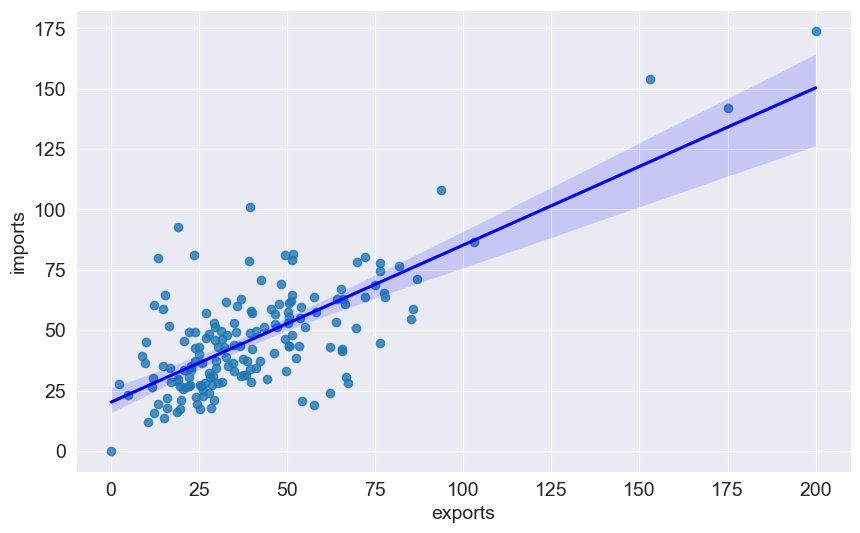

In [82]:
sns.regplot(x=country_df.exports, y=country_df.imports, line_kws={'color':'blue'});

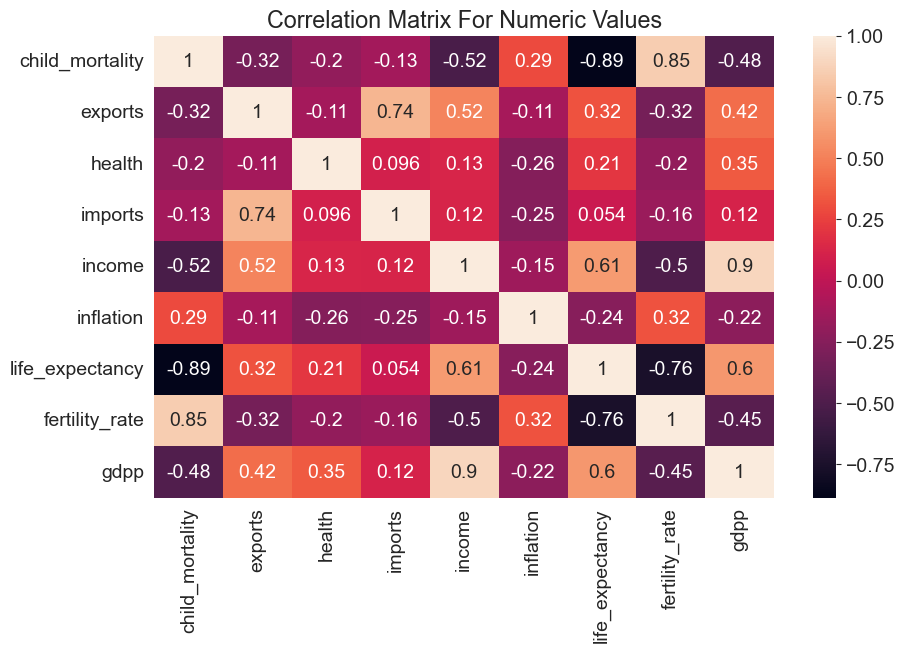

In [94]:
plt.title('Correlation Matrix For Numeric Values')
sns.heatmap(correlation, annot=True);

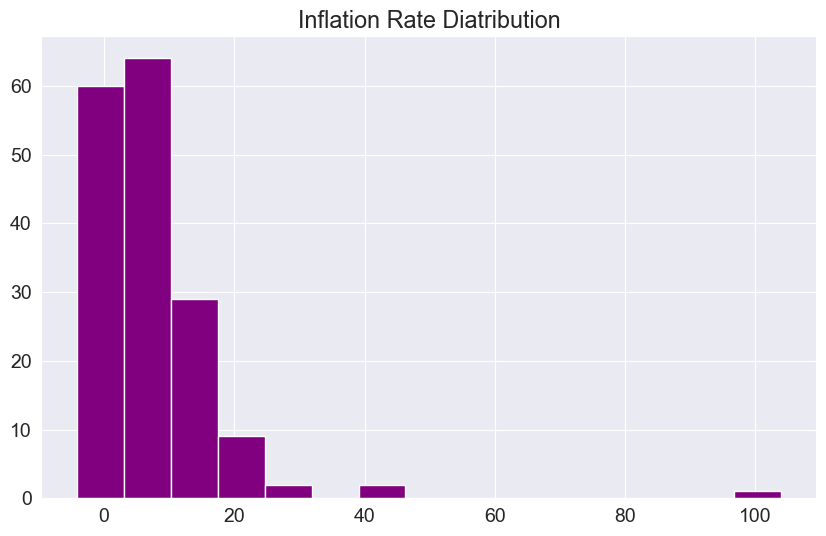

In [99]:
plt.title('Inflation Rate Diatribution')
plt.hist(country_df.inflation, bins=15,color='purple', edgecolor='white');
